# Pooled OLS Analysis of SGX Data

## Load data and libraries

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from linearmodels.panel import PooledOLS
from statsmodels.iolib import save_pickle

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sgx = pd.read_csv("data/clean_sgx.csv", index_col= None)
sgx.columns

Index(['Company', 'NACE', 'Year', 'TA', 'CA', 'FA', 'TL', 'CL', 'DEBT',
       'TAXEX', 'INTEX', 'TE', 'PROFIT', 'SALES', 'EBITDA', 'EBIT', 'DA',
       'CFO', 'CAPEX', 'MCAP', 'SOLV', 'SORA', 'CPI', 'Company Code', 'SIZE',
       'PROFITABILITY', 'TANG', 'RISK', 'LIQUID', 'NDTSHIELD', 'TAXRATE',
       'FCFF', 'GROWPOT', 'LEVERAGE'],
      dtype='object')

In [3]:
# Set index to indicate that the data has both cross-sectional and time panels

sgx = sgx.set_index(['Company', 'Year'])
sgx

NACE            TA            CA  \
Company                   Year                                       
A SONIC AEROSPACE LIMITED 2015.0    26  6.107200e+07  4.941900e+07   
                          2016.0    26  6.467500e+07  5.772600e+07   
                          2017.0    26  7.524600e+07  6.803700e+07   
                          2018.0    26  7.359400e+07  6.584300e+07   
                          2019.0    26  6.428400e+07  5.679200e+07   
...                                ...           ...           ...   
YONGNAM HOLDINGS LIMITED  2018.0    71  3.503341e+08  1.196307e+08   
                          2019.0    71  3.429246e+08  1.037248e+08   
                          2020.0    71  2.913047e+08  6.392860e+07   
                          2021.0    71  2.595798e+08  6.673153e+07   
                          2022.0    71  2.308791e+08  6.542243e+07   

                                            FA            TL            CL  \
Company                   Year                                               
A SONIC AEROSPACE LIMITED 2015.0  1.079300e+07  3.331800e+07  3.160000e+07   
                          2016.0  6.258000e+06  3.964200e+07  3.835100e+07   
                          2017.0  6.118000e+06  5.161200e+07  5.066000e+07   
                          2018.0  5.849000e+06  4.928100e+07  4.870300e+07   
                          2019.0  7.293000e+06  3.731000e+07  3.643600e+07   
...                                        ...           ...           ...   
YONGNAM HOLDINGS LIMITED  2018.0  2.306594e+08  1.703341e+08  1.032232e+08   
                          2019.0  2.351062e+08  2.013324e+08  1.504135e+08   
                          2020.0  2.236608e+08  2.061644e+08  1.618667e+08   
                          2021.0  1.896449e+08  1.906858e+08  1.146763e+08   
                          2022.0  1.623702e+08  1.868504e+08  1.612576e+08   

                                          DEBT         TAXEX         INTEX  \
Company                   Year                                               
A SONIC AEROSPACE LIMITED 2015.0 -1.437900e+07  2.910000e+05  1.397000e+06   
                          2016.0 -1.338600e+07 -2.650000e+05  1.194000e+06   
                          2017.0 -1.792500e+07 -2.160000e+05 -3.950000e+05   
                          2018.0 -1.906200e+07 -1.820000e+05 -1.061000e+06   
                          2019.0 -1.432700e+07 -3.740000e+05  9.940000e+05   
...                                        ...           ...           ...   
YONGNAM HOLDINGS LIMITED  2018.0  9.217834e+07  8.678195e+06 -1.413687e+07   
                          2019.0  1.227331e+08  3.608225e+06  3.050772e+05   
                          2020.0  1.292187e+08 -4.172907e+06  1.708872e+07   
                          2021.0  1.165392e+08  4.512836e+04  6.949027e+06   
                          2022.0  1.057712e+08 -9.296445e+04  1.471962e+07   

                                            TE  ...       SIZE  PROFITABILITY  \
Company                   Year                  ...                             
A SONIC AEROSPACE LIMITED 2015.0  2.775400e+07  ...  17.927564      -0.094659   
                          2016.0  2.503300e+07  ...  17.984885      -0.010839   
                          2017.0  2.363400e+07  ...  18.136273      -0.013888   
                          2018.0  2.431300e+07  ...  18.114074       0.013371   
                          2019.0  2.697400e+07  ...  17.978821       0.078838   
...                                        ...  ...        ...            ...   
YONGNAM HOLDINGS LIMITED  2018.0  1.800000e+08  ...  19.674398      -0.059740   
                          2019.0  1.415922e+08  ...  19.653021      -0.033475   
                          2020.0  8.514031e+07  ...  19.489881      -0.064894   
                          2021.0  6.889399e+07  ...  19.374575       0.027514   
                          2022.0  4.402871e+07  ...  19.257405       0.009406   

                                      T

## Multicollinearity Analysis of Initial Model

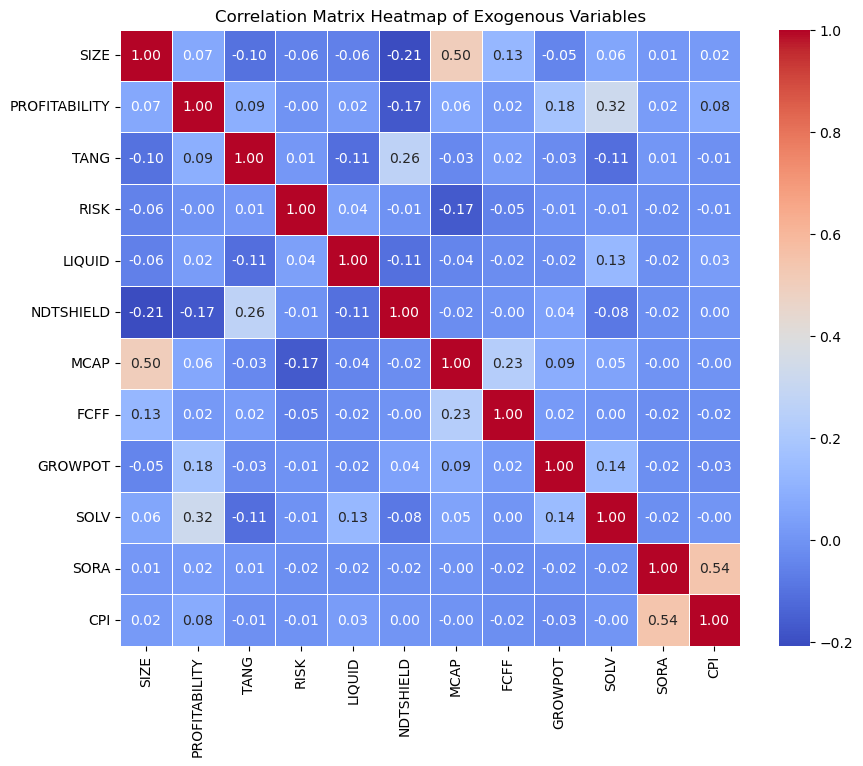

In [4]:
exog_vars = ['SIZE',
             'PROFITABILITY',
             'TANG',
             'RISK',
             'LIQUID',
             'NDTSHIELD',
             'MCAP',
             'FCFF',
             'GROWPOT',
             'SOLV',
             'SORA',
             'CPI']

exog = sgx[exog_vars]

corr_matrix = exog.corr()

# Create heatmap
plt.figure(figsize= (10, 8))
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm', fmt= ".2f", linewidths= 0.5)
plt.title('Correlation Matrix Heatmap of Exogenous Variables')
plt.show()


## Fit PooledOLS

### Fit all variables in our initial model

In [5]:
endo_var = 'LEVERAGE'
exog_vars = ['SIZE',
             'PROFITABILITY',
             'TANG',
             'RISK',
             'LIQUID',
             'NDTSHIELD',
             'MCAP',
             'FCFF',
             'GROWPOT',
             'SOLV',
             'SORA',
             'CPI']

endo = sgx[endo_var]
exog = sm.add_constant(sgx[exog_vars])

pooled_mod = PooledOLS(dependent = endo,
                       exog = exog)

pooled_res = pooled_mod.fit()

print(pooled_res.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:               LEVERAGE   R-squared:                        0.3632
Estimator:                  PooledOLS   R-squared (Between):              0.4300
No. Observations:                1728   R-squared (Within):               0.0580
Date:                Sun, Mar 31 2024   R-squared (Overall):              0.3632
Time:                        00:42:21   Log-likelihood                    283.56
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      81.520
Entities:                         216   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                 F(12,1715)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             81.520
                            

We drop Free Cashflow to Firm (FCFF) as it has the highest p-value and is completely insignificant to the model (p = 0.9536)

### 1st drop: FCFF

In [6]:
endo_var = 'LEVERAGE'
exog_vars = ['SIZE',
             'PROFITABILITY',
             'TANG',
             'RISK',
             'LIQUID',
             'NDTSHIELD',
             'MCAP',
             'GROWPOT',
             'SOLV',
             'SORA',
             'CPI']

endo = sgx[endo_var]
exog = sm.add_constant(sgx[exog_vars])


pooled_mod = PooledOLS(dependent = endo,
                       exog = exog)

pooled_res = pooled_mod.fit()

print(pooled_res.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:               LEVERAGE   R-squared:                        0.3632
Estimator:                  PooledOLS   R-squared (Between):              0.4300
No. Observations:                1728   R-squared (Within):               0.0579
Date:                Sun, Mar 31 2024   R-squared (Overall):              0.3632
Time:                        00:42:22   Log-likelihood                    283.55
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      88.983
Entities:                         216   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                 F(11,1716)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             88.983
                            

Model F-Test remains significant after dropping FCFF, and in fact, the F-Statistic of the beta coefficients increases. We follow up by dropping Non-Debt Tax Shield (NDTS) as it now has the highest p-value and is completely insignificant to the model (p = 0.6724).

### 2nd drop: NDTS

In [7]:
endo_var = 'LEVERAGE'
exog_vars = ['SIZE',
             'PROFITABILITY',
             'TANG',
             'RISK',
             'LIQUID',
             'MCAP',
             'GROWPOT',
             'SOLV',
             'SORA',
             'CPI']

endo = sgx[endo_var]
exog = sm.add_constant(sgx[exog_vars])

pooled_mod = PooledOLS(dependent = endo,
                       exog = exog)

pooled_res = pooled_mod.fit()

print(pooled_res.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:               LEVERAGE   R-squared:                        0.3632
Estimator:                  PooledOLS   R-squared (Between):              0.4296
No. Observations:                1728   R-squared (Within):               0.0595
Date:                Sun, Mar 31 2024   R-squared (Overall):              0.3632
Time:                        00:42:22   Log-likelihood                    283.46
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      97.910
Entities:                         216   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                 F(10,1717)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             97.910
                            

F-Statistic of the beta coefficients further improves after dropping NDTS. We follow up by dropping Consumer Price Index (CPI) as it now has the highest p-value and is completely insignificant to the model (p = 0.6561).

### 3rd drop: CPI

In [8]:
endo_var = 'LEVERAGE'
exog_vars = ['SIZE',
             'PROFITABILITY',
             'TANG',
             'RISK',
             'LIQUID',
             'MCAP',
             'GROWPOT',
             'SOLV',
             'SORA']

endo = sgx[endo_var]
exog = sm.add_constant(sgx[exog_vars])


pooled_mod = PooledOLS(dependent = endo,
                       exog = exog)

pooled_res = pooled_mod.fit()

print(pooled_res.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:               LEVERAGE   R-squared:                        0.3631
Estimator:                  PooledOLS   R-squared (Between):              0.4297
No. Observations:                1728   R-squared (Within):               0.0584
Date:                Sun, Mar 31 2024   R-squared (Overall):              0.3631
Time:                        00:42:23   Log-likelihood                    283.36
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      108.82
Entities:                         216   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(9,1718)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             108.82
                            

F-Statistic of the beta coefficients further improves after dropping CPI. There are still insignificant variables (p = 0.4248) in the model like the Singapore Overnight Rate Average (SORA) which we will drop to try and improve the parsimoniousness of the model.

### 4th drop: SORA

In [9]:
endo_var = 'LEVERAGE'
exog_vars = ['SIZE',
             'PROFITABILITY',
             'TANG',
             'RISK',
             'LIQUID',
             'MCAP',
             'GROWPOT',
             'SOLV']

endo = sgx[endo_var]
exog = sm.add_constant(sgx[exog_vars])

pooled_mod = PooledOLS(dependent = endo,
                       exog = exog)

pooled_res = pooled_mod.fit()

print(pooled_res.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:               LEVERAGE   R-squared:                        0.3628
Estimator:                  PooledOLS   R-squared (Between):              0.4297
No. Observations:                1728   R-squared (Within):               0.0570
Date:                Sun, Mar 31 2024   R-squared (Overall):              0.3628
Time:                        00:42:23   Log-likelihood                    283.04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      122.37
Entities:                         216   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(8,1719)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             122.37
                            

Dropping SORA again raises the F-Statistic of the model, but is unable to lower the p-value of other previously insignificant variables. We can continue to refine the model by dropping the next most insignificant variable, Growth Potential (GROWPOT), which has a p-value of 0.3956.

### 5th drop: GROWPOT

In [10]:
endo_var = 'LEVERAGE'
exog_vars = ['SIZE',
             'PROFITABILITY',
             'TANG',
             'RISK',
             'LIQUID',
             'MCAP',
             'SOLV']

endo = sgx[endo_var]
exog = sm.add_constant(sgx[exog_vars])

pooled_mod = PooledOLS(dependent = endo,
                       exog = exog)

pooled_res = pooled_mod.fit()

print(pooled_res.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:               LEVERAGE   R-squared:                        0.3626
Estimator:                  PooledOLS   R-squared (Between):              0.4301
No. Observations:                1728   R-squared (Within):               0.0538
Date:                Sun, Mar 31 2024   R-squared (Overall):              0.3626
Time:                        00:42:24   Log-likelihood                    282.68
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      139.77
Entities:                         216   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(7,1720)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             139.77
                            

The model is further improved by dropping GROWPOT, and only Business Risk (RISK) remains insignificant (0.2514) to the model.

### Final & 6th drop: RISK

In [11]:
endo_var = 'LEVERAGE'
exog_vars = ['SIZE',
             'PROFITABILITY',
             'TANG',
             'LIQUID',
             'MCAP',
             'SOLV']

endo = sgx[endo_var]
exog = sm.add_constant(sgx[exog_vars])

pooled_mod = PooledOLS(dependent = endo,
                       exog = exog)

pooled_res = pooled_mod.fit()

print(pooled_res.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:               LEVERAGE   R-squared:                        0.3621
Estimator:                  PooledOLS   R-squared (Between):              0.4292
No. Observations:                1728   R-squared (Within):               0.0550
Date:                Sun, Mar 31 2024   R-squared (Overall):              0.3621
Time:                        00:42:24   Log-likelihood                    282.02
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      162.81
Entities:                         216   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(6,1721)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             162.81
                            

All variables in the model are highly significant (F = 162.81). Model should not be refined further via dropping of variables, and we shall proceed with this model specification as the based of all further model estimates.

#### Saving Non-Robust Model

In [12]:
save_pickle(obj= pooled_res, fname= 'model/pooled_ols.pickle')

## Robust PooledOLS

The model built thus far has not been tested for either heteroskedasticity nor serial correlation. We shall run robust estimations of the model to investigate the necessity for robustifying the model against either violations of the standard OLS estimation method.

### Heteroskedastic Robust Estimator

In [12]:
endo_var = 'LEVERAGE'
exog_vars = ['SIZE',
             'PROFITABILITY',
             'TANG',
             'LIQUID',
             'MCAP',
             'SOLV']

endo = sgx[endo_var]
exog = sm.add_constant(sgx[exog_vars])

pooled_mod = PooledOLS(dependent = endo,
                       exog = exog)

pooled_res = pooled_mod.fit(cov_type = 'robust')

print(pooled_res.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:               LEVERAGE   R-squared:                        0.3621
Estimator:                  PooledOLS   R-squared (Between):              0.4292
No. Observations:                1728   R-squared (Within):               0.0550
Date:                Sat, Mar 30 2024   R-squared (Overall):              0.3621
Time:                        01:22:14   Log-likelihood                    282.02
Cov. Estimator:                Robust                                           
                                        F-statistic:                      162.81
Entities:                         216   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(6,1721)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             113.38
                            

The magnitude of the t-Statistics of LIQUID and SOLV reduced significantly, although not enough to change the significance levels of their coefficients in the model. There might be presence of some heteroskedasticty in the model.

### HAC Estimator

In [13]:
endo_var = 'LEVERAGE'
exog_vars = ['SIZE',
             'PROFITABILITY',
             'TANG',
             'LIQUID',
             'MCAP',
             'SOLV']

endo = sgx[endo_var]
exog = sm.add_constant(sgx[exog_vars])

pooled_mod = PooledOLS(dependent = endo,
                       exog = exog)

pooled_res = pooled_mod.fit(cov_type = 'kernel')

print(pooled_res.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:               LEVERAGE   R-squared:                        0.3621
Estimator:                  PooledOLS   R-squared (Between):              0.4292
No. Observations:                1728   R-squared (Within):               0.0550
Date:                Sat, Mar 30 2024   R-squared (Overall):              0.3621
Time:                        01:22:14   Log-likelihood                    282.02
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      162.81
Entities:                         216   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(6,1721)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):          1.201e+06
                            

Similar to the White Robust model, the significance of the model parameters are unchanged when using HAC robust estimates. The t-Statistic of LIQUID reduced significantly, but does not affect the p-value estimates visibly whilst MCAP's t-Statistic is much more inflated but also has an unaffected p-value. There may be presence of autocorrelation in this Pooled OLS model but not enough to warrant the disuse of the non-robust model. The F-Statistic of the HAC robust model also balloons, but considering the significance of the non-robust model already, there is again no tangible impact on the relevance of either models.

### Cluster Robust Model

#### Whiten for correlation between entity clusters

In [14]:
endo_var = 'LEVERAGE'
exog_vars = ['SIZE',
             'PROFITABILITY',
             'TANG',
             'LIQUID',
             'MCAP',
             'SOLV']

endo = sgx[endo_var]
exog = sm.add_constant(sgx[exog_vars])

pooled_mod = PooledOLS(dependent = endo,
                       exog = exog)

pooled_res = pooled_mod.fit(cov_type = 'clustered', cluster_entity= True)

print(pooled_res.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:               LEVERAGE   R-squared:                        0.3621
Estimator:                  PooledOLS   R-squared (Between):              0.4292
No. Observations:                1728   R-squared (Within):               0.0550
Date:                Sat, Mar 30 2024   R-squared (Overall):              0.3621
Time:                        01:22:14   Log-likelihood                    282.02
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      162.81
Entities:                         216   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(6,1721)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             44.533
                            

The F-Statistic of the model falls greatly to 44.533 after applying cluster robust estimates across the Company clusters. We can observe this as a result of the increase in the standard error of MCAP, resulting in an increase of the p-value (0.0308) which still remains significant at 5%. This is the most visible impact on the model parameters, but across the board, coefficient standard errors doubled or more. Most likely, there exists a significant correlation within entity clusters, which is to be expected as Firm's are likely to have an internal preference or targets of leverage.

#### Whiten for correlation between time clusters

In [15]:
endo_var = 'LEVERAGE'
exog_vars = ['SIZE',
             'PROFITABILITY',
             'TANG',
             'LIQUID',
             'MCAP',
             'SOLV']

endo = sgx[endo_var]
exog = sm.add_constant(sgx[exog_vars])

pooled_mod = PooledOLS(dependent = endo,
                       exog = exog)

pooled_res = pooled_mod.fit(cov_type = 'clustered', cluster_time= True)

print(pooled_res.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:               LEVERAGE   R-squared:                        0.3621
Estimator:                  PooledOLS   R-squared (Between):              0.4292
No. Observations:                1728   R-squared (Within):               0.0550
Date:                Sat, Mar 30 2024   R-squared (Overall):              0.3621
Time:                        01:22:14   Log-likelihood                    282.02
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      162.81
Entities:                         216   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(6,1721)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):          2.969e+05
                            

The reverse occurs here and standard errors remained consistent generally, even decreasing significantly for MCAP. It may have increased for LIQUID, but neither were sufficient to change our understanding of their significance to the model. This might be indicative that companies on the SGX are resistant to economic driven effects when deciding their leverage ratios.

In [16]:
endo_var = 'LEVERAGE'
exog_vars = ['SIZE',
             'PROFITABILITY',
             'TANG',
             'LIQUID',
             'MCAP',
             'SOLV']

endo = sgx[endo_var]
exog = sm.add_constant(sgx[exog_vars])

pooled_mod = PooledOLS(dependent = endo,
                       exog = exog)

pooled_res = pooled_mod.fit(cov_type = 'clustered', cluster_entity= True, cluster_time= True)

print(pooled_res.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:               LEVERAGE   R-squared:                        0.3621
Estimator:                  PooledOLS   R-squared (Between):              0.4292
No. Observations:                1728   R-squared (Within):               0.0550
Date:                Sat, Mar 30 2024   R-squared (Overall):              0.3621
Time:                        01:22:15   Log-likelihood                    282.02
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      162.81
Entities:                         216   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(6,1721)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             52.577
                            

When clustering for both time and company panels, we can observe the effects of each clusterings independently. It is evident that the non-effects of the time clusterings are reducing the impact of the entity clustering on the overall model.

## Multicollinearity Analysis of Final Model

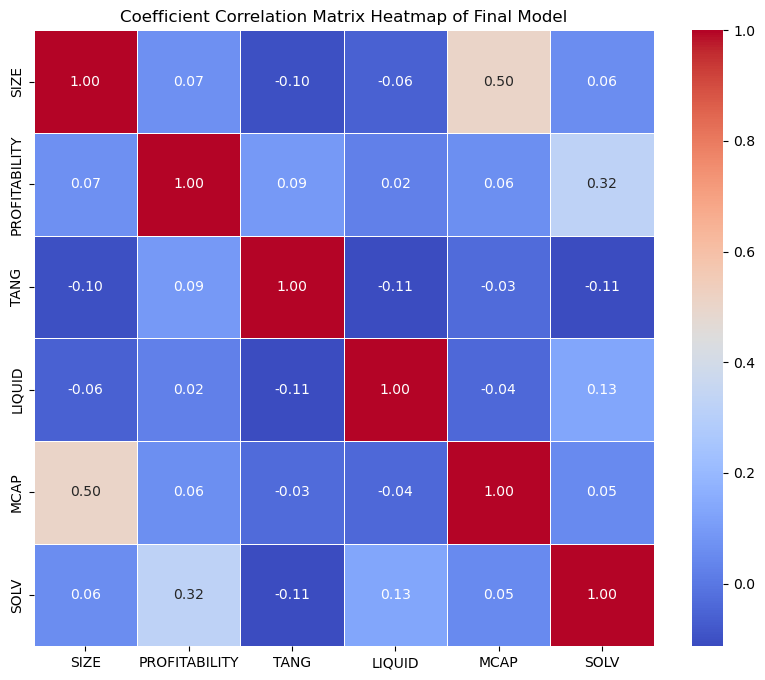

In [17]:
exog_vars = ['SIZE',
             'PROFITABILITY',
             'TANG',
             'LIQUID',
             'MCAP',
             'SOLV']

exog = sgx[exog_vars]

corr_matrix = exog.corr()

# Create heatmap
plt.figure(figsize= (10, 8))
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm', fmt= ".2f", linewidths= 0.5)
plt.title('Coefficient Correlation Matrix Heatmap of Final Model')
plt.show()


## Producing final model

In [18]:
endo_var = 'LEVERAGE'
exog_vars = ['SIZE',
             'PROFITABILITY',
             'TANG',
             'LIQUID',
             'MCAP',
             'SOLV']

endo = sgx[endo_var]
exog = sm.add_constant(sgx[exog_vars])

final_mod = PooledOLS(dependent = endo,
                       exog = exog)

final_res = pooled_mod.fit(cov_type = 'clustered', cluster_entity= True)


In [45]:
save_pickle(obj= final_res, fname= "model/entity_clus_pooled_ols.pickle")